In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data, val_data, test_data = tfds.load("mnist", 
                                            split=['train[20%:]', 'test[0%:20%]', 'test'],
                                            as_supervised= True)

def helper(ds): 
  x, y = [], []
  for x_, y_ in tfds.as_numpy(ds):
    x.append(x_)
    y.append(y_)
  return np.asarray(x)/255.0, np.asarray(y)
  
train_images, train_labels = helper (train_data)
val_images, val_labels = helper (val_data)
test_images, test_labels = helper(test_data)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


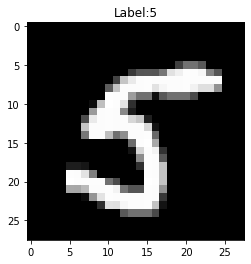

In [ ]:
for img, label in zip(train_images, train_labels):
  plt.imshow(img[..., 0], cmap = 'gray')
  plt.title('Label:' + str(label))
  break

In [ ]:
class_names = ['0', '1', '2', '3', '4',
'5', '6', '7', '8', '9']

In [ ]:
#Create CNN Model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding = 'same', input_shape=(28, 28,1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
history = model.fit(train_images, train_labels, validation_data=[val_images, val_labels], epochs = 10)


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 32)          4640      
                                                                 
 flatten_2 (Flatten)         (None, 1568)             

In [ ]:
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, validation_data=[val_images, val_labels], epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.2007 - accuracy: 0.9368 - val_loss: 0.0519 - val_accuracy: 0.9810
Epoch 2/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0684 - accuracy: 0.9790 - val_loss: 0.0281 - val_accuracy: 0.9900
Epoch 3/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.0370 - val_accuracy: 0.9845
Epoch 4/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0283 - val_accuracy: 0.9895
Epoch 5/10
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.0366 - val_accuracy: 0.9890
Epoch 6/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0258 - accuracy: 0.9915 - val_loss: 0.0242 - val_accuracy: 0.9915
Epoch 7/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0245 -

Text(0.5, 0, 'epoch')

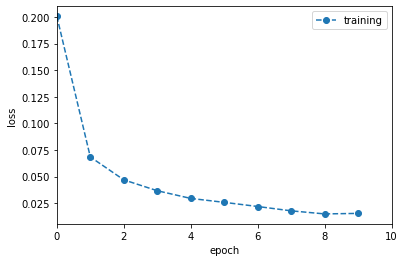

In [ ]:
plt.plot(history.history['loss'],'--', marker='o', label="training")
plt.xlim(0,10)


plt.legend()
plt.ylabel("loss")
plt.xlabel("epoch")